In [1]:
import cellpose
from macrohet import tools, dataio, visualise, colours
import glob
import os
import zarr
import numpy as np
import napari
from tqdm.auto import tqdm
from skimage import io


In [2]:
from matplotlib.colors import LinearSegmentedColormap
# Get the PiYG colormap
cmap_piyg = plt.get_cmap('PiYG')
N=10 #len(condition_indices)
# Define the indices for the pink colors in PiYG
start_index = 0  # Start of pink colors
end_index = 128-50    # End of pink colors (PiYG has 256 colors)
# Extract the pink colors from PiYG
pink_colors = cmap_piyg(range(start_index, end_index + 1))
# Create a custom pink colormap
# custom_pink_cmap = LinearSegmentedColormap.from_list('CustomPink', pink_colors,  N=len(condition_indices))
# Calculate indices for evenly spaced colors
pink_indices = np.linspace(0, len(pink_colors) - 1, N, dtype=int)
custom_pink_cmap = pink_colors[pink_indices]

# Define the indices for the pink colors in PiYG
start_index = 128+50# Start of pink colors
end_index = 255    # End of pink colors (PiYG has 256 colors)

# Extract the pink colors from PiYG
green_colors = cmap_piyg(range(start_index, end_index + 1))
green_colors = np.flip(green_colors, axis = 0)
# Create a custom pink colormap
# custom_green_cmap = LinearSegmentedColormap.from_list('CustomGreen', green_colors, N=len(condition_indices))
green_indices = np.linspace(0, len(green_colors) - 1, N, dtype=int)
custom_green_cmap = green_colors[green_indices]

expanded_piyg = colours.expanded_piyg

NameError: name 'plt' is not defined

In [3]:
!nvcc --version
!nvidia-smi

from cellpose import core, utils, io, models, metrics

use_GPU = core.use_gpu()
yn = ['NO', 'YES']
print(f'>>> GPU activated? {yn[use_GPU]}')

model = models.Cellpose(gpu=True, model_type='cyto')

def segment(img, ):
    masks, flows, styles, diams = model.eval(img, diameter=350, channels=[0,0],
                                             flow_threshold=None, cellprob_threshold=0)
    return masks

/bin/bash: /home/dayn/miniconda3/envs/egg/lib/python3.9/site-packages/cv2/../../../../lib/libtinfo.so.6: no version information available (required by /bin/bash)
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Wed_Nov_22_10:17:15_PST_2023
Cuda compilation tools, release 12.3, V12.3.107
Build cuda_12.3.r12.3/compiler.33567101_0
/bin/bash: /home/dayn/miniconda3/envs/egg/lib/python3.9/site-packages/cv2/../../../../lib/libtinfo.so.6: no version information available (required by /bin/bash)
Fri Apr 12 17:02:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.23.08              Driver Version: 545.23.08    CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util

INFO:cellpose.core:** TORCH CUDA version installed and working. **
INFO:cellpose.core:** TORCH CUDA version installed and working. **
INFO:cellpose.core:>>>> using GPU
INFO:cellpose.models:>> cyto << model set to be used
INFO:cellpose.models:>>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
INFO:cellpose.models:>>>> model diam_labels =  30.000 (mean diameter of training ROIs)


>>> GPU activated? YES


In [4]:
expt_ID = 'ND0003'
location =  'SYNO' #'DATA' # 'NEMO' #
base_dir = f'/mnt/{location}/macrohet_{location.lower()}/{expt_ID}/'
metadata_fn = os.path.join(base_dir, 'acquisition/Images/Index.idx.xml')
metadata = dataio.read_harmony_metadata(metadata_fn)  
metadata_fn = glob.glob(os.path.join(base_dir, 'acquisition/Assaylayout/*.xml'))[0]
assay_layout = dataio.read_harmony_metadata(metadata_fn, assay_layout=True,)

Reading metadata XML file...


0it [00:00, ?it/s]

Extracting metadata complete!
Reading metadata XML file...
Extracting metadata complete!


In [5]:
assay_layout

Strain Compound Concentration ConcentrationEC  Replicate #
Row Column                                                           
3   1         UNI     CTRL             0             EC0            1
    2         UNI     CTRL             0             EC0            2
    3          WT     CTRL             0             EC0            1
    4          WT     CTRL             0             EC0            2
    5          WT      PZA            60            EC50            1
    6          WT      PZA            60            EC50            2
    7          WT      RIF           0.1            EC50            1
    8          WT      RIF           0.1            EC50            2
    9          WT      INH          0.04            EC50            1
    10         WT      INH          0.04            EC50            2
    11         WT      BDQ          0.02            EC50            1
    12         WT      BDQ          0.02            EC50            2
4   3          WT     CTRL             0             EC0            3
    4          WT     CTRL             0             EC0            4
    5          WT      PZA           400            EC99            1
    6          WT      PZA           400            EC99            2
    7          WT      RIF             2            EC99            1
    8          WT      RIF             2            EC99            2
    9          WT      INH             2            EC99            1
    10         WT      INH             2            EC99            2
    11         WT      BDQ           2.5            EC99            1
    12         WT      BDQ           2.5            EC99            2
5   3         RD1     CTRL             0             EC0            1
    4         RD1     CTRL             0             EC0            2
    5         RD1      PZA            60            EC50            1
    6         RD1      PZA            60            EC50            2
    7         RD1      RIF           0.1            EC50            1
    8         RD1      RIF           0.1            EC50            2
    9         RD1      INH          0.04            EC50            1
    10        RD1      INH          0.04            EC50            2
    11        RD1      BDQ          0.02            EC50            1
    12        RD1      BDQ          0.02            EC50            2
6   3         RD1     CTRL             0             EC0            3
    4         RD1     CTRL             0             EC0            4
    5         RD1      PZA           400            EC99            1
    6         RD1      PZA           400            EC99            2
    7         RD1      RIF             2            EC99            1
    8         RD1      RIF             2            EC99            2
    9         RD1      INH             2            EC99            1
    10        RD1      INH             2            EC99            2
    11        RD1      BDQ           2.5            EC99            1
    12        RD1      BDQ           2.5            EC99            2

In [6]:
acq_ID = (3, 4)

In [7]:
zarr_group = zarr.open(f'/mnt/SYNO/macrohet_syno/{expt_ID}/acquisition/zarr/{acq_ID}.zarr', mode='r')

In [8]:
images = zarr_group.images

In [9]:
images.shape

(154, 2, 3, 6048, 6048)

In [10]:
%%time
z0_images = images[:,:,0,...]

CPU times: user 20.1 s, sys: 1min 28s, total: 1min 48s
Wall time: 6min 3s


In [11]:
viewer = napari.Viewer(title='Testing segmentation')

viewer.add_image(z0_images, channel_axis = 1)

[<Image layer 'Image' at 0x7fbf04f97b20>,
 <Image layer 'Image [1]' at 0x7fb7e850ddc0>]

In [22]:
help(model.eval)

Help on method eval in module cellpose.models:

eval(x, batch_size=8, channels=None, channel_axis=None, invert=False, normalize=True, diameter=30.0, do_3D=False, **kwargs) method of cellpose.models.Cellpose instance
    run cellpose size model and mask model and get masks
    
    see all parameters in CellposeModel eval function
    
    Parameters
    ----------
    x: list or array of images
        can be list of 2D/3D images, or array of 2D/3D images, or 4D image array
    
    batch_size: int (optional, default 8)
        number of 224x224 patches to run simultaneously on the GPU
        (can make smaller or bigger depending on GPU memory usage)
    
    channels: list (optional, default None)
        list of channels, either of length 2 or of length number of images by 2.
        First element of list is the channel to segment (0=grayscale, 1=red, 2=green, 3=blue).
        Second element of list is the optional nuclear channel (0=none, 1=red, 2=green, 3=blue).
        For instan

In [30]:
reordered_z0 = [frame for frame in z0_images[:,1,...]]

In [33]:
1985-1630

355

In [40]:

model = models.Cellpose(gpu=True, model_type='cyto3')


masks, flows, styles, diams = model.eval(reordered_z0[0], #z0_images[:,1,...],
                                         diameter = 250
                                        )
                                         # diameter=None, #350
                                         # channels=[0,0],
                                         # flow_threshold=None, 
                                         # cellprob_threshold=0)

INFO:cellpose.core:** TORCH CUDA version installed and working. **
INFO:cellpose.core:>>>> using GPU
INFO:cellpose.models:>> cyto3 << model set to be used
INFO:cellpose.models:>>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
INFO:cellpose.models:~~~ FINDING MASKS ~~~
INFO:cellpose.models:>>>> TOTAL TIME 77.38 sec


In [42]:
masks.shape

(6048, 6048)

In [41]:
viewer.add_labels(masks)

<Labels layer 'masks [4]' at 0x7fb7a8617fa0>

In [29]:
viewer.add_image(reordered_z0[...,0])

<Image layer 'Image [2]' at 0x7fb81dab5ac0>

In [21]:
z0_images[:,1,...].shape, masks.shape

((154, 6048, 6048), (154, 6048))

In [13]:
viewer.add_labels(masks)

<Labels layer 'masks' at 0x7fb8144bb8b0>

In [14]:
from macrohet import notify
notify.send_sys_message()

In [15]:
import btrack

In [16]:
with btrack.io.HDF5FileHandler(os.path.join(base_dir, f'labels/{acq_ID}_cellposev3_seg.h5'), 
                                       'w', 
                                       obj_type='obj_type_1'
                                       ) as writer:
            writer.write_segmentation(segmentation)


[INFO][2024/04/12 05:11:06 pm] Opening HDF file: /mnt/SYNO/macrohet_syno/ND0003/labels/(3, 4)_cellposev3_seg.h5...
INFO:btrack.io.hdf:Opening HDF file: /mnt/SYNO/macrohet_syno/ND0003/labels/(3, 4)_cellposev3_seg.h5...
[INFO][2024/04/12 05:11:06 pm] Closing HDF file: /mnt/SYNO/macrohet_syno/ND0003/labels/(3, 4)_cellposev3_seg.h5
INFO:btrack.io.hdf:Closing HDF file: /mnt/SYNO/macrohet_syno/ND0003/labels/(3, 4)_cellposev3_seg.h5


NameError: name 'segmentation' is not defined

# Try whole stack overnight

In [42]:
image_stack = np.max(images[:,1,:,...], axis = 1)

In [43]:
mask_stack = []
for img in tqdm(image_stack):
    masks, flows, styles, diams = model.eval(img,
                                             diameter = 350)
                                             # diameter=None, #350
                                             # channels=[0,0],
                                             # flow_threshold=None, 
                                             # cellprob_threshold=0)
    mask_stack.append(masks)
segmentation = np.stack(mask_stack, axis = 0)

  0%|          | 0/150 [00:00<?, ?it/s]

In [46]:
viewer.add_image(image_stack)
viewer.add_labels(segmentation)

<Labels layer 'segmentation' at 0x7f8c656df250>

In [47]:
import btrack

In [50]:
with btrack.io.HDF5FileHandler(os.path.join(base_dir, f'labels/macrohet_seg_model/{acq_ID}_cellposev3_seg.h5'), 
                                       'w', 
                                       obj_type='obj_type_1'
                                       ) as writer:
            writer.write_segmentation(segmentation)

[INFO][2024/02/16 10:33:00 am] Opening HDF file: /mnt/SYNO/macrohet_syno/ND0002/labels/macrohet_seg_model/(3, 4)_celllposev3_seg.h5...
[INFO][2024/02/16 10:33:53 am] Closing HDF file: /mnt/SYNO/macrohet_syno/ND0002/labels/macrohet_seg_model/(3, 4)_celllposev3_seg.h5


# test track first


### Load rfp images

In [68]:
gfp_image_stack = image_stack
rfp_image_stack = np.max(images[:,0,:,...], axis = 1)

In [69]:
Mtb_load_thresh = 480

In [71]:
# define thresholds
segment_size_thresh = 5000
Mtb_load_thresh = 480

# define tracking scale factor
scale_factor = 1/5.04

In [70]:
intensity_image = manual_mtb_thresh = np.where(rfp_image_stack >= Mtb_load_thresh, 1, 0)

### Simple localisation

In [72]:
 # define features to use for tracking 
features = [
  "area",
  "major_axis_length",
  "minor_axis_length",
  "orientation",
  "mean_intensity",
    ]

properties = tuple(features)

In [73]:
objects = btrack.utils.segmentation_to_objects(segmentation=segmentation,
                                                   intensity_image=intensity_image, 
                                                   properties=properties,
                                                   scale=(scale_factor,scale_factor),
                                                   use_weighted_centroid=False, 
                                                   )    

[INFO][2024/02/16 11:25:01 am] Localizing objects from segmentation...
INFO:btrack.io._localization:Localizing objects from segmentation...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [05:14<00:00,  2.10s/it]
[INFO][2024/02/16 11:30:16 am] Objects are of type: <class 'dict'>
INFO:btrack.io.utils:Objects are of type: <class 'dict'>
[INFO][2024/02/16 11:30:16 am] ...Found 38265 objects in 150 frames.
INFO:btrack.io._localization:...Found 38265 objects in 150 frames.


In [74]:
with btrack.io.HDF5FileHandler(os.path.join(base_dir, f'labels/macrohet_seg_model/{acq_ID}_cellposev3_objs.h5'), 
                                       'w', 
                                       obj_type='obj_type_1'
                                       ) as writer:
            writer.write_objects(objects)

[INFO][2024/02/16 11:30:16 am] Opening HDF file: /mnt/SYNO/macrohet_syno/ND0002/labels/macrohet_seg_model/(3, 4)_cellposev3_objs.h5...
INFO:btrack.io.hdf:Opening HDF file: /mnt/SYNO/macrohet_syno/ND0002/labels/macrohet_seg_model/(3, 4)_cellposev3_objs.h5...
[INFO][2024/02/16 11:30:17 am] Writing objects/obj_type_1
INFO:btrack.io.hdf:Writing objects/obj_type_1
[INFO][2024/02/16 11:30:17 am] Writing labels/obj_type_1
INFO:btrack.io.hdf:Writing labels/obj_type_1
[INFO][2024/02/16 11:30:17 am] Loading objects/obj_type_1 (38265, 5) (38265 filtered: None)
INFO:btrack.io.hdf:Loading objects/obj_type_1 (38265, 5) (38265 filtered: None)
[INFO][2024/02/16 11:30:18 am] Writing properties/obj_type_1/area (38265,)
INFO:btrack.io.hdf:Writing properties/obj_type_1/area (38265,)
[INFO][2024/02/16 11:30:18 am] Writing properties/obj_type_1/major_axis_length (38265,)
INFO:btrack.io.hdf:Writing properties/obj_type_1/major_axis_length (38265,)
[INFO][2024/02/16 11:30:18 am] Writing properties/obj_type_1/m

In [75]:
objects = [o for o in objects if o.properties['area'] > segment_size_thresh]


In [76]:
for obj in objects:
    obj.properties = ({"Infected": True} 
                        if obj.properties['mean_intensity'] > 0 # index 2 for manual mtb channel 
                        else {"Infected": False})
    obj.properties = ({"Mtb area px": obj.properties['mean_intensity']*obj.properties['area']})

In [106]:
config_fn = '/home/dayn/analysis/models/btrack/particle_config_pnassign.json'
search_radius = 20

# initialise a tracker session using a context manager
with btrack.BayesianTracker() as tracker:
    # configure the tracker using a config file
    tracker.configure(config_fn)
    # set max search radius
    tracker.max_search_radius = search_radius
    # define tracking method
    tracker.tracking_updates = ["MOTION", "VISUAL"]
    # redefine features so that both channels are included in track measurements
    tracker.features = list(objects[0].properties.keys())
    # append the objects to be tracked
    tracker.append(objects)
    # set the tracking volume
    tracker.volume=((0, segmentation.shape[-2]*scale_factor), (0, segmentation.shape[-1]*scale_factor))
    # track them (in interactive mode)
    tracker.track(step_size=25)
    # generate hypotheses and run the global optimizer
    tracker.optimize()
    # store the tracks
    tracks = tracker.tracks

[INFO][2024/02/16 02:12:16 pm] Loaded btrack: /home/dayn/analysis/btrack/btrack/libs/libtracker.so
INFO:btrack.libwrapper:Loaded btrack: /home/dayn/analysis/btrack/btrack/libs/libtracker.so
[INFO][2024/02/16 02:12:16 pm] Starting BayesianTracker session
INFO:btrack.core:Starting BayesianTracker session
[INFO][2024/02/16 02:12:16 pm] Loading configuration file: /home/dayn/analysis/models/btrack/particle_config_pnassign.json
INFO:btrack.config:Loading configuration file: /home/dayn/analysis/models/btrack/particle_config_pnassign.json
[INFO][2024/02/16 02:12:16 pm] Objects are of type: <class 'list'>
INFO:btrack.io.utils:Objects are of type: <class 'list'>
[INFO][2024/02/16 02:12:17 pm] Starting tracking... 
INFO:btrack.core:Starting tracking... 
[INFO][2024/02/16 02:12:17 pm] Update using: ['MOTION', 'VISUAL']
INFO:btrack.core:Update using: ['MOTION', 'VISUAL']
[INFO][2024/02/16 02:12:17 pm] Tracking objects in frames 0 to 24 (of 150)...
INFO:btrack.core:Tracking objects in frames 0 to 2

GLPK Integer Optimizer 5.0
16944 rows, 14040 columns, 19608 non-zeros
14040 integer variables, all of which are binary
Preprocessing...
8472 rows, 14040 columns, 19608 non-zeros
14040 integer variables, all of which are binary
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 8472
Solving LP relaxation...
GLPK Simplex Optimizer 5.0
8472 rows, 14040 columns, 19608 non-zeros
*     0: obj =   4.973911752e+04 inf =   0.000e+00 (3580)
Perturbing LP to avoid stalling [1839]...
Removing LP perturbation [3640]...
*  3640: obj =   2.538365859e+04 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Integer optimization begins...
Long-step dual simplex will be used
+  3640: mip =     not found yet >=              -inf        (1; 0)
+  3640: >>>>>   2.538365859e+04 >=   2.538365859e+04   0.0% (1; 0)
+  3640: mip =   2.538365859e+04 >=     tree is empty   0.0% (0; 1)
INTEGER OPTIMA

[INFO][2024/02/16 02:12:27 pm] Ending BayesianTracker session
INFO:btrack.core:Ending BayesianTracker session


In [78]:
with btrack.io.HDF5FileHandler(os.path.join(base_dir, f'labels/macrohet_seg_model/{acq_ID}_cellposev3_tracks.h5'), 
                                       'w', 
                                       obj_type='obj_type_1'
                                       ) as writer:
            writer.write_tracks(tracks)
    

[INFO][2024/02/16 11:30:28 am] Opening HDF file: /mnt/SYNO/macrohet_syno/ND0002/labels/macrohet_seg_model/(3, 4)_cellposev3_tracks.h5...
INFO:btrack.io.hdf:Opening HDF file: /mnt/SYNO/macrohet_syno/ND0002/labels/macrohet_seg_model/(3, 4)_cellposev3_tracks.h5...
[INFO][2024/02/16 11:30:29 am] Writing objects/obj_type_1
INFO:btrack.io.hdf:Writing objects/obj_type_1
[INFO][2024/02/16 11:30:29 am] Writing labels/obj_type_1
INFO:btrack.io.hdf:Writing labels/obj_type_1
[INFO][2024/02/16 11:30:29 am] Loading objects/obj_type_1 (26814, 5) (26814 filtered: None)
INFO:btrack.io.hdf:Loading objects/obj_type_1 (26814, 5) (26814 filtered: None)
[INFO][2024/02/16 11:30:29 am] Writing properties/obj_type_1/area (26814,)
INFO:btrack.io.hdf:Writing properties/obj_type_1/area (26814,)
[INFO][2024/02/16 11:30:29 am] Writing properties/obj_type_1/major_axis_length (26814,)
INFO:btrack.io.hdf:Writing properties/obj_type_1/major_axis_length (26814,)
[INFO][2024/02/16 11:30:29 am] Writing properties/obj_type

In [101]:
napari_tracks, _, _ = btrack.utils.tracks_to_napari(tracks, ndim=2)

In [102]:
viewer.add_tracks(napari_tracks, scale=(1/scale_factor,1/scale_factor))

<Tracks layer 'napari_tracks' at 0x7f8c15ca9d60>

### filter tracks

In [114]:
napari_tracks, _, _ = btrack.utils.tracks_to_napari([t for t in tracks if len(t) >= 70], ndim=2)

In [115]:
len([t for t in tracks if len(t) >= 75])

70

In [116]:
viewer.add_tracks(napari_tracks, scale=(1/scale_factor,1/scale_factor), name = 'filtered')

<Tracks layer 'filtered [8]' at 0x7f8c04e4aeb0>

# comparison with previous segmentation model

In [127]:
with btrack.io.HDF5FileHandler('/mnt/SYNO/macrohet_syno/ND0002/labels/macrohet_seg_model/(3, 4)_first_pass.h5', 
                               'r',
                               obj_type='obj_type_1') as reader:
    # tracks = reader.tracks
    objects_2 = reader.objects

[INFO][2024/02/16 02:45:54 pm] Opening HDF file: /mnt/SYNO/macrohet_syno/ND0002/labels/macrohet_seg_model/(3, 4)_first_pass.h5...
INFO:btrack.io.hdf:Opening HDF file: /mnt/SYNO/macrohet_syno/ND0002/labels/macrohet_seg_model/(3, 4)_first_pass.h5...
[INFO][2024/02/16 02:45:54 pm] Loading objects/obj_type_1 (50141, 5) (50141 filtered: None)
INFO:btrack.io.hdf:Loading objects/obj_type_1 (50141, 5) (50141 filtered: None)
[INFO][2024/02/16 02:45:55 pm] Closing HDF file: /mnt/SYNO/macrohet_syno/ND0002/labels/macrohet_seg_model/(3, 4)_first_pass.h5
INFO:btrack.io.hdf:Closing HDF file: /mnt/SYNO/macrohet_syno/ND0002/labels/macrohet_seg_model/(3, 4)_first_pass.h5


In [129]:
config_fn = '/home/dayn/analysis/models/btrack/particle_config_pnassign.json'
search_radius = 20

# initialise a tracker session using a context manager
with btrack.BayesianTracker() as tracker:
    # configure the tracker using a config file
    tracker.configure(config_fn)
    # set max search radius
    tracker.max_search_radius = search_radius
    # define tracking method
    tracker.tracking_updates = ["MOTION", "VISUAL"]
    # redefine features so that both channels are included in track measurements
    tracker.features = list(objects_2[0].properties.keys())
    # append the objects to be tracked
    tracker.append(objects_2)
    # set the tracking volume
    tracker.volume=((0, segmentation.shape[-2]*scale_factor), (0, segmentation.shape[-1]*scale_factor))
    # track them (in interactive mode)
    tracker.track(step_size=25)
    # generate hypotheses and run the global optimizer
    tracker.optimize()
    # store the tracks
    tracks = tracker.tracks

[INFO][2024/02/16 02:47:30 pm] Loaded btrack: /home/dayn/analysis/btrack/btrack/libs/libtracker.so
INFO:btrack.libwrapper:Loaded btrack: /home/dayn/analysis/btrack/btrack/libs/libtracker.so
[INFO][2024/02/16 02:47:30 pm] Starting BayesianTracker session
INFO:btrack.core:Starting BayesianTracker session
[INFO][2024/02/16 02:47:30 pm] Loading configuration file: /home/dayn/analysis/models/btrack/particle_config_pnassign.json
INFO:btrack.config:Loading configuration file: /home/dayn/analysis/models/btrack/particle_config_pnassign.json
[INFO][2024/02/16 02:47:30 pm] Objects are of type: <class 'list'>
INFO:btrack.io.utils:Objects are of type: <class 'list'>
[INFO][2024/02/16 02:47:31 pm] Starting tracking... 
INFO:btrack.core:Starting tracking... 
[INFO][2024/02/16 02:47:31 pm] Update using: ['MOTION', 'VISUAL']
INFO:btrack.core:Update using: ['MOTION', 'VISUAL']
[INFO][2024/02/16 02:47:31 pm] Tracking objects in frames 0 to 24 (of 150)...
INFO:btrack.core:Tracking objects in frames 0 to 2

GLPK Integer Optimizer 5.0
28504 rows, 24393 columns, 34534 non-zeros
24393 integer variables, all of which are binary
Preprocessing...
14252 rows, 24393 columns, 34534 non-zeros
24393 integer variables, all of which are binary
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 14252
Solving LP relaxation...
GLPK Simplex Optimizer 5.0
14252 rows, 24393 columns, 34534 non-zeros
*     0: obj =   8.367006095e+04 inf =   0.000e+00 (6978)
Perturbing LP to avoid stalling [2415]...
Removing LP perturbation [7046]...
*  7046: obj =   4.136481206e+04 inf =   0.000e+00 (0) 2
OPTIMAL LP SOLUTION FOUND
Integer optimization begins...
Long-step dual simplex will be used
+  7046: mip =     not found yet >=              -inf        (1; 0)
+  7046: >>>>>   4.136481206e+04 >=   4.136481206e+04   0.0% (1; 0)
+  7046: mip =   4.136481206e+04 >=     tree is empty   0.0% (0; 1)
INTEGER O

[INFO][2024/02/16 02:47:57 pm] Completed optimization with 5500 tracks
INFO:btrack.core:Completed optimization with 5500 tracks
[INFO][2024/02/16 02:47:57 pm] Ending BayesianTracker session
INFO:btrack.core:Ending BayesianTracker session


In [130]:
napari_tracks, _, _ = btrack.utils.tracks_to_napari(tracks, ndim=2)

In [131]:
viewer.add_tracks(napari_tracks, scale=(1/scale_factor,1/scale_factor))

<Tracks layer 'napari_tracks' at 0x7f8bf54c4940>

### filter tracks

In [132]:
napari_tracks, _, _ = btrack.utils.tracks_to_napari([t for t in tracks if len(t) >= 70], ndim=2)

In [133]:
len([t for t in tracks if len(t) >= 75])

149

In [134]:
viewer.add_tracks(napari_tracks, scale=(1/scale_factor,1/scale_factor), name = 'filtered')

<Tracks layer 'filtered [9]' at 0x7f8bfd2e9160>

# Check performance of other macroseg model on new acquisitions

In [169]:
assay_layout

Strain Compound Concentration ConcentrationEC
Row Column                                              
3   1         UNI     CTRL             0             EC0
    2         UNI     CTRL             0             EC0
    3          WT     CTRL             0             EC0
    4          WT     CTRL             0             EC0
    5          WT      PZA            60            EC50
    6          WT      PZA            60            EC50
    7          WT      RIF           0.1            EC50
    8          WT      RIF           0.1            EC50
    9          WT      INH          0.04            EC50
    10         WT      INH          0.04            EC50
    11         WT      BDQ          0.02            EC50
    12         WT      BDQ          0.02            EC50
4   3          WT     CTRL             0             EC0
    4          WT     CTRL             0             EC0
    5          WT      PZA           400            EC99
    6          WT      PZA           400            EC99
    7          WT      RIF             2            EC99
    8          WT      RIF             2            EC99
    9          WT      INH             2            EC99
    10         WT      INH             2            EC99
    11         WT      BDQ           2.5            EC99
    12         WT      BDQ           2.5            EC99
5   3         RD1     CTRL             0             EC0
    4         RD1     CTRL             0             EC0
    5         RD1      PZA            60            EC50
    6         RD1      PZA            60            EC50
    7         RD1      RIF           0.1            EC50
    8         RD1      RIF           0.1            EC50
    9         RD1      INH          0.04            EC50
    10        RD1      INH          0.04            EC50
    11        RD1      BDQ          0.02            EC50
    12        RD1      BDQ          0.02            EC50
6   3         RD1     CTRL             0             EC0
    4         RD1     CTRL             0             EC0
    5         RD1      PZA           400            EC99
    6         RD1      PZA           400            EC99
    7         RD1      RIF             2            EC99
    8         RD1      RIF             2            EC99
    9         RD1      INH             2            EC99
    10        RD1      INH             2            EC99
    11        RD1      BDQ           2.5            EC99
    12        RD1      BDQ           2.5            EC99

In [170]:
acq_ID = (4, 12)

In [171]:
zarr_group = zarr.open(f'/mnt/SYNO/macrohet_syno/{expt_ID}/acquisition/zarr/{acq_ID}.zarr', mode='r')

In [172]:
images = zarr_group.images

In [173]:
images.shape

(150, 2, 3, 6048, 6048)

In [177]:
%%time
images = np.max(images[:,1,:,...], axis = 1)

CPU times: user 39.2 s, sys: 58 s, total: 1min 37s
Wall time: 3min 21s


In [180]:
images.shape

(150, 6048, 6048)

In [182]:
with btrack.io.HDF5FileHandler(f'/mnt/SYNO/macrohet_syno/ND0002/labels/macrohet_seg_model/{acq_ID}_first_pass_seg_backup.h5', 
                               'r',
                               obj_type='obj_type_1') as reader:
    # tracks = reader.tracks
    segmentation_2 = reader.segmentation

[INFO][2024/02/16 03:35:39 pm] Opening HDF file: /mnt/SYNO/macrohet_syno/ND0002/labels/macrohet_seg_model/(4, 12)_first_pass_seg_backup.h5...
INFO:btrack.io.hdf:Opening HDF file: /mnt/SYNO/macrohet_syno/ND0002/labels/macrohet_seg_model/(4, 12)_first_pass_seg_backup.h5...
[INFO][2024/02/16 03:36:01 pm] Loading segmentation (150, 6048, 6048)
INFO:btrack.io.hdf:Loading segmentation (150, 6048, 6048)
[INFO][2024/02/16 03:36:01 pm] Closing HDF file: /mnt/SYNO/macrohet_syno/ND0002/labels/macrohet_seg_model/(4, 12)_first_pass_seg_backup.h5
INFO:btrack.io.hdf:Closing HDF file: /mnt/SYNO/macrohet_syno/ND0002/labels/macrohet_seg_model/(4, 12)_first_pass_seg_backup.h5


In [183]:
v_2 = napari.Viewer(title = f'{acq_ID}')

v_2.add_image(images)

<Image layer 'images' at 0x7f8c78d7bf40>

In [184]:
v_2.add_labels(segmentation_2)

<Labels layer 'segmentation_2' at 0x7f8c794c9ee0>

In [186]:
objects_2 =  btrack.utils.segmentation_to_objects(segmentation=segmentation_2,
                                                   intensity_image=images, 
                                                   properties=properties,
                                                   scale=(scale_factor,scale_factor),
                                                   use_weighted_centroid=False, 
                                                   )    

[INFO][2024/02/16 03:38:36 pm] Localizing objects from segmentation...
INFO:btrack.io._localization:Localizing objects from segmentation...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [03:43<00:00,  1.49s/it]
[INFO][2024/02/16 03:42:20 pm] Objects are of type: <class 'dict'>
INFO:btrack.io.utils:Objects are of type: <class 'dict'>
[INFO][2024/02/16 03:42:20 pm] ...Found 35489 objects in 150 frames.
INFO:btrack.io._localization:...Found 35489 objects in 150 frames.


In [187]:
objects_2 = [o for o in objects_2 if o.properties['area'] > segment_size_thresh]


In [188]:
config_fn = '/home/dayn/analysis/models/btrack/particle_config_pnassign.json'
search_radius = 20

# initialise a tracker session using a context manager
with btrack.BayesianTracker() as tracker:
    # configure the tracker using a config file
    tracker.configure(config_fn)
    # set max search radius
    tracker.max_search_radius = search_radius
    # define tracking method
    tracker.tracking_updates = ["MOTION", "VISUAL"]
    # redefine features so that both channels are included in track measurements
    tracker.features = list(objects_2[0].properties.keys())
    # append the objects to be tracked
    tracker.append(objects_2)
    # set the tracking volume
    tracker.volume=((0, segmentation.shape[-2]*scale_factor), (0, segmentation.shape[-1]*scale_factor))
    # track them (in interactive mode)
    tracker.track(step_size=25)
    # generate hypotheses and run the global optimizer
    tracker.optimize()
    # store the tracks
    tracks = tracker.tracks

[INFO][2024/02/16 03:43:11 pm] Loaded btrack: /home/dayn/analysis/btrack/btrack/libs/libtracker.so
INFO:btrack.libwrapper:Loaded btrack: /home/dayn/analysis/btrack/btrack/libs/libtracker.so
[INFO][2024/02/16 03:43:11 pm] Starting BayesianTracker session
INFO:btrack.core:Starting BayesianTracker session
[INFO][2024/02/16 03:43:11 pm] Loading configuration file: /home/dayn/analysis/models/btrack/particle_config_pnassign.json
INFO:btrack.config:Loading configuration file: /home/dayn/analysis/models/btrack/particle_config_pnassign.json
[INFO][2024/02/16 03:43:11 pm] Objects are of type: <class 'list'>
INFO:btrack.io.utils:Objects are of type: <class 'list'>
[INFO][2024/02/16 03:43:11 pm] Starting tracking... 
INFO:btrack.core:Starting tracking... 
[INFO][2024/02/16 03:43:11 pm] Update using: ['MOTION', 'VISUAL']
INFO:btrack.core:Update using: ['MOTION', 'VISUAL']
[INFO][2024/02/16 03:43:11 pm] Tracking objects in frames 0 to 24 (of 150)...
INFO:btrack.core:Tracking objects in frames 0 to 2

GLPK Integer Optimizer 5.0
10428 rows, 8726 columns, 12238 non-zeros
8726 integer variables, all of which are binary
Preprocessing...
5214 rows, 8726 columns, 12238 non-zeros
8726 integer variables, all of which are binary
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 5214
Solving LP relaxation...
GLPK Simplex Optimizer 5.0
5214 rows, 8726 columns, 12238 non-zeros
*     0: obj =   3.055618205e+04 inf =   0.000e+00 (2549)
Perturbing LP to avoid stalling [1243]...
Removing LP perturbation [2591]...
*  2591: obj =   1.429559724e+04 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Integer optimization begins...
Long-step dual simplex will be used
+  2591: mip =     not found yet >=              -inf        (1; 0)
+  2591: >>>>>   1.429559724e+04 >=   1.429559724e+04   0.0% (1; 0)
+  2591: mip =   1.429559724e+04 >=     tree is empty   0.0% (0; 1)
INTEGER OPTIMAL SOL

In [189]:
napari_tracks, _, _ = btrack.utils.tracks_to_napari(tracks, ndim=2)

In [190]:
v_2.add_tracks(napari_tracks, scale=(1/scale_factor,1/scale_factor))

<Tracks layer 'napari_tracks' at 0x7f8c78fc45e0>

### filter tracks

In [191]:
napari_tracks, _, _ = btrack.utils.tracks_to_napari([t for t in tracks if len(t) >= 70], ndim=2)

In [192]:
len([t for t in tracks if len(t) >= 75])

66

In [194]:
v_2.add_tracks(napari_tracks, scale=(1/scale_factor,1/scale_factor), name = 'filtered')

<Tracks layer 'filtered' at 0x7f8c15fe2fd0>

# Going back to cpv3 to chekc area measurements

In [198]:
objects[1]

,ID,x,y,z,t,dummy,states,label,area,major_axis_length,minor_axis_length,orientation,mean_intensity,Infected,Mtb area px
0,1,563.550037,13.155885,0.0,0,False,7,5,25162,234.099845,149.399704,1.500681,0.014228,True,358.0


In [199]:
viewer.add_points([0, 13*5.04, 563*5.04], size = 100)

<Points layer 'Points' at 0x7f8c05703190>

In [217]:
np.sum(viewer.layers['Labels'].data)

358

# First pass seg then second pass

In [150]:

model = models.Cellpose(gpu=True, model_type='cyto3')


INFO:cellpose.core:** TORCH CUDA version installed and working. **
INFO:cellpose.core:>>>> using GPU
INFO:cellpose.models:>> cyto3 << model set to be used
INFO:cellpose.models:>>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)


In [166]:
masks, flows, styles, diams = model.eval(image_frame,
                                         diameter = 300,)
                                         # diameter=None, #350
                                         # channels=[0,0],
                                         # flow_threshold=None, 
                                         # cellprob_threshold=6)

INFO:cellpose.models:~~~ FINDING MASKS ~~~
INFO:cellpose.models:>>>> TOTAL TIME 70.33 sec


In [157]:
viewer.add_image(masks)

<Image layer 'masks [3]' at 0x7f8bfee78370>

In [167]:
viewer.add_labels(masks)

<Labels layer 'masks [6]' at 0x7f8bfc89d880>

# Check tracking performance of cpv3

In [6]:
import btrack

In [4]:
os.listdir('/mnt/SYNO/macrohet_syno/ND0002/labels/cpv3/')

['(3, 1)_cpv3_mask_backup.h5',
 '(3, 1)_cpv3_objects_backup.h5',
 '(3, 1)_cpv3_tracks_backup.h5',
 '(3, 2)_cpv3_mask_backup.h5',
 '(3, 2)_cpv3_objects_backup.h5',
 '(3, 2)_cpv3_tracks_backup.h5',
 '(3, 3)_cpv3_mask_backup.h5',
 '(3, 3)_cpv3_objects_backup.h5',
 '(3, 3)_cpv3_tracks_backup.h5',
 '(3, 4)_cpv3_mask_backup.h5',
 '(3, 4)_cpv3_objects_backup.h5',
 '(3, 4)_cpv3_tracks_backup.h5',
 '(3, 5)_cpv3_mask_backup.h5',
 '(3, 5)_cpv3_objects_backup.h5',
 '(3, 5)_cpv3_tracks_backup.h5',
 '(3, 6)_cpv3_mask_backup.h5',
 '(3, 6)_cpv3_objects_backup.h5',
 '(3, 6)_cpv3_tracks_backup.h5',
 '(3, 7)_cpv3_mask_backup.h5',
 '(3, 7)_cpv3_objects_backup.h5',
 '(3, 7)_cpv3_tracks_backup.h5',
 '(3, 8)_cpv3_mask_backup.h5',
 '(3, 8)_cpv3_objects_backup.h5',
 '(3, 8)_cpv3_tracks_backup.h5',
 '(3, 9)_cpv3_mask_backup.h5',
 '(3, 9)_cpv3_objects_backup.h5',
 '(3, 9)_cpv3_tracks_backup.h5',
 '(3, 10)_cpv3_mask_backup.h5',
 '(3, 10)_cpv3_objects_backup.h5',
 '(3, 10)_cpv3_tracks_backup.h5',
 '(3, 11)_cpv3_ma

In [16]:
acq_ID = (3, 10)

In [24]:
with btrack.io.HDF5FileHandler(f'/mnt/SYNO/macrohet_syno/ND0002/labels/cpv3/{acq_ID}_cpv3_mask_backup.h5',  
                               'r',  
                               obj_type='obj_type_1') as reader:
    segmentation = reader.segmentation

[INFO][2024/02/20 10:52:48 am] Opening HDF file: /mnt/SYNO/macrohet_syno/ND0002/labels/cpv3/(3, 10)_cpv3_mask_backup.h5...
INFO:btrack.io.hdf:Opening HDF file: /mnt/SYNO/macrohet_syno/ND0002/labels/cpv3/(3, 10)_cpv3_mask_backup.h5...
[INFO][2024/02/20 10:53:09 am] Loading segmentation (150, 6048, 6048)
INFO:btrack.io.hdf:Loading segmentation (150, 6048, 6048)
[ERROR][2024/02/20 10:53:09 am] Objects not found in /mnt/SYNO/macrohet_syno/ND0002/labels/cpv3/(3, 10)_cpv3_mask_backup.h5
ERROR:btrack.io.hdf:Objects not found in /mnt/SYNO/macrohet_syno/ND0002/labels/cpv3/(3, 10)_cpv3_mask_backup.h5
[INFO][2024/02/20 10:53:09 am] Closing HDF file: /mnt/SYNO/macrohet_syno/ND0002/labels/cpv3/(3, 10)_cpv3_mask_backup.h5
INFO:btrack.io.hdf:Closing HDF file: /mnt/SYNO/macrohet_syno/ND0002/labels/cpv3/(3, 10)_cpv3_mask_backup.h5


In [27]:
with btrack.io.HDF5FileHandler(f'/mnt/SYNO/macrohet_syno/ND0002/labels/cpv3/{acq_ID}_cpv3_objects_backup.h5',  
                               'r',  
                               obj_type='obj_type_1') as reader:
    objects = reader.objects

[INFO][2024/02/20 11:28:06 am] Opening HDF file: /mnt/SYNO/macrohet_syno/ND0002/labels/cpv3/(3, 10)_cpv3_objects_backup.h5...
INFO:btrack.io.hdf:Opening HDF file: /mnt/SYNO/macrohet_syno/ND0002/labels/cpv3/(3, 10)_cpv3_objects_backup.h5...
[INFO][2024/02/20 11:28:06 am] Loading objects/obj_type_1 (16662, 5) (16662 filtered: None)
INFO:btrack.io.hdf:Loading objects/obj_type_1 (16662, 5) (16662 filtered: None)
[INFO][2024/02/20 11:28:07 am] Closing HDF file: /mnt/SYNO/macrohet_syno/ND0002/labels/cpv3/(3, 10)_cpv3_objects_backup.h5
INFO:btrack.io.hdf:Closing HDF file: /mnt/SYNO/macrohet_syno/ND0002/labels/cpv3/(3, 10)_cpv3_objects_backup.h5


In [31]:
objects[0]

,ID,x,y,z,t,dummy,states,label,orientation,minor_axis_length,Mtb area px,major_axis_length,mean_intensity,Infected,area
0,0,274.934998,27.110874,0.0,0,False,7,5,1.197135,280.610748,0.0,453.785065,"(3,) array",0.0,97973.0


In [29]:
objects[0].properties['mean_intensity']

array([ 123.38782, 1043.9843 ,    0.     ], dtype=float32)

In [34]:
# define features to use for tracking 
features = [
  "area",
  "major_axis_length",
  "minor_axis_length",
  "orientation",
  "mean_intensity",
    ]

# define tracker config fn to use, using a prob_not_assign = 0.1
config_fn = '/home/dayn/analysis/models/btrack/particle_config_pnassign.json'

# define tracker search radius
search_radius = 20

# scale 
scale_factor = 5.04

In [35]:
# initialise a tracker session using a context manager
with btrack.BayesianTracker() as tracker:
    # configure the tracker using a config file
    tracker.configure(config_fn)
    # set max search radius
    tracker.max_search_radius = search_radius
    # define tracking method
    tracker.tracking_updates = ["MOTION", "VISUAL"]
    # redefine features so that both channels are included in track measurements
    tracker.features = list(objects[0].properties.keys())
    # append the objects to be tracked
    tracker.append(objects)
    # set the tracking volume
    tracker.volume=((0, segmentation.shape[-2]*scale_factor), (0, segmentation.shape[-1]*scale_factor))
    # track them (in interactive mode)
    tracker.track(step_size=25)
    # generate hypotheses and run the global optimizer
    tracker.optimize()
    # store the tracks
    tracks = tracker.tracks

[INFO][2024/02/20 11:32:31 am] Loaded btrack: /home/dayn/analysis/btrack/btrack/libs/libtracker.so
INFO:btrack.libwrapper:Loaded btrack: /home/dayn/analysis/btrack/btrack/libs/libtracker.so
[INFO][2024/02/20 11:32:31 am] Starting BayesianTracker session
INFO:btrack.core:Starting BayesianTracker session
[INFO][2024/02/20 11:32:31 am] Loading configuration file: /home/dayn/analysis/models/btrack/particle_config_pnassign.json
INFO:btrack.config:Loading configuration file: /home/dayn/analysis/models/btrack/particle_config_pnassign.json
[INFO][2024/02/20 11:32:31 am] Objects are of type: <class 'list'>
INFO:btrack.io.utils:Objects are of type: <class 'list'>
[INFO][2024/02/20 11:32:31 am] Starting tracking... 
INFO:btrack.core:Starting tracking... 
[INFO][2024/02/20 11:32:31 am] Update using: ['MOTION', 'VISUAL']
INFO:btrack.core:Update using: ['MOTION', 'VISUAL']
[INFO][2024/02/20 11:32:31 am] Tracking objects in frames 0 to 24 (of 150)...
INFO:btrack.core:Tracking objects in frames 0 to 2

GLPK Integer Optimizer 5.0
9196 rows, 7433 columns, 10268 non-zeros
7433 integer variables, all of which are binary
Preprocessing...
4598 rows, 7433 columns, 10268 non-zeros
7433 integer variables, all of which are binary
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 4598
Solving LP relaxation...
GLPK Simplex Optimizer 5.0
4598 rows, 7433 columns, 10268 non-zeros
*     0: obj =   2.769938391e+04 inf =   0.000e+00 (1963)
Perturbing LP to avoid stalling [1393]...
Removing LP perturbation [2000]...
*  2000: obj =   1.290831113e+04 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Integer optimization begins...
Long-step dual simplex will be used
+  2000: mip =     not found yet >=              -inf        (1; 0)
+  2000: >>>>>   1.290831113e+04 >=   1.290831113e+04   0.0% (1; 0)
+  2000: mip =   1.290831113e+04 >=     tree is empty   0.0% (0; 1)
INTEGER OPTIMAL SOLU

In [18]:
zarr_group = zarr.open(f'/mnt/SYNO/macrohet_syno/{expt_ID}/acquisition/zarr/{acq_ID}.zarr', mode='r')
zarr_images = zarr_group.images

In [20]:
%%time
images = zarr_images[:,:,0,...]

CPU times: user 18.1 s, sys: 28 s, total: 46.1 s
Wall time: 1min 53s


In [39]:
zarr_images

<zarr.core.Array '/images' (150, 2, 3, 6048, 6048) uint16 read-only>

In [40]:
images.shape

(150, 2, 6048, 6048)

In [22]:
viewer = napari.Viewer(title = f'checking tracks and segmentation for {expt_ID, acq_ID}')

viewer.add_image(images, channel_axis=1)
viewer.add_labels(segmentation)

<Labels layer 'segmentation' at 0x7f31034800a0>

In [38]:
napari_tracks, _, _ = btrack.utils.tracks_to_napari([t for t in tracks if len(t) > 70], ndim = 2)
viewer.add_tracks(napari_tracks, scale=(scale_factor, scale_factor))


<Tracks layer 'napari_tracks [1]' at 0x7f2ec57b0640>

In [41]:
len([t for t in tracks if len(t) > 70])

49

In [42]:
filtered_tracks = [t for t in tracks if len(t) > 70]

In [44]:
import seaborn as sns

In [47]:
masks = segmentation[43]

In [43]:
filtered_tracks[0]

,ID,t,x,y,z,parent,root,state,generation,dummy,orientation,Infected,minor_axis_length,Mtb area px,major_axis_length,mean_intensity,area
0,90,0,685.918945,687.030457,0.000000,90,90,5,0,False,0.311266,0.0,184.928009,0.0,366.125519,"(3,) array",50963.0
1,90,1,684.025696,689.668152,0.000000,90,90,5,0,False,0.312920,0.0,191.579071,0.0,365.113464,"(3,) array",53832.0
2,90,2,683.981567,684.971924,0.000000,90,90,5,0,False,0.296510,0.0,193.664749,0.0,348.737793,"(3,) array",50615.0
3,90,3,681.782166,678.069519,0.000000,90,90,5,0,False,0.425501,0.0,216.891220,0.0,395.252686,"(3,) array",64138.0
4,90,4,684.644653,681.602844,0.000000,90,90,5,0,False,0.219048,0.0,212.872772,0.0,351.873596,"(3,) array",55132.0
5,90,5,685.457214,679.287292,0.000000,90,90,5,0,False,0.305812,0.0,239.700073,0.0,286.098389,"(3,) array",52668.0
6,90,6,678.284729,680.526184,0.000000,90,90,5,0,False,0.141007,0.0,219.444321,0.0,318.963257,"(3,) array",53089.0
7,90,7,666.354614,686.850647,0.000000,90,90,5,0,False,-0.805897,0.0,263.837402,0.0,441.576477,"(3,) array",78240.0
8,90,8,672.707153,671.837891,0.000000,90,90,5,0,False,0.695895,0.0,230.790421,0.0,443.143768,"(3,) array",74773.0
9,90,9,678.193298,672.099731,0.000000,90,90,5,0,False,0.486222,0.0,242.876572,0.0,333.566040,"(3,) array",61874.0


/home/dayn/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

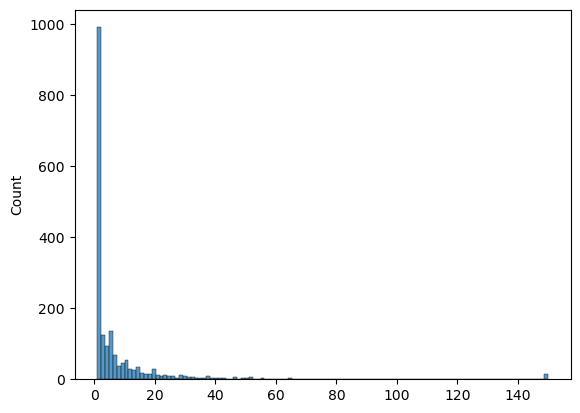

In [52]:
sns.histplot([len(t) for t in tracks])

/home/dayn/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

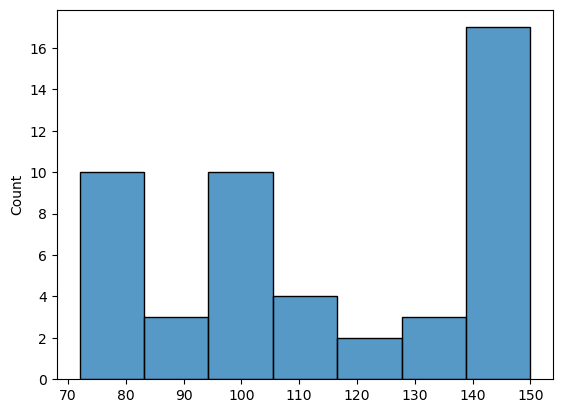

In [51]:
sns.histplot([len(t) for t in filtered_tracks])

In [55]:
visualise.add_napari_grid_overlay(viewer)

<Shapes layer 'grid_lines' at 0x7f2ec40e77f0>

In [64]:
cell_ID = 46
t = [t for t in tracks if t.ID == cell_ID][0]

/home/dayn/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dayn/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

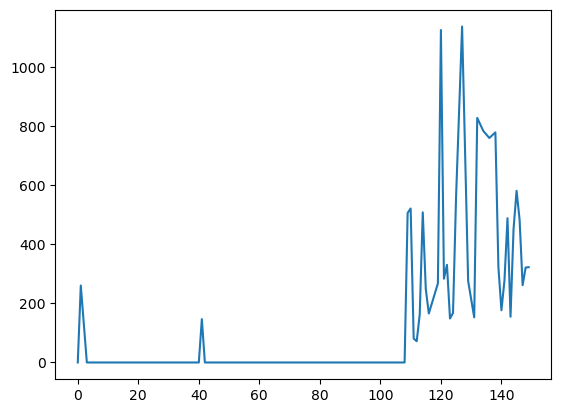

In [58]:
sns.lineplot(t.properties['Mtb area px'])

# Plotting a Richards Growth Curve over ZERO values

In [67]:
image_resolution = 1.49E-7
frames_to_hours_scale_factor = 0.5

meters_area_per_pixel = image_resolution**2
mum_sq_scale_factor = (1E-6)**2
pixel_to_mum_sq_scale_factor = meters_area_per_pixel/mum_sq_scale_factor

from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the Richards growth model function
def richards_growth(t, K, N0, b, m):
    return K / (1 + ((K / N0 - 1) * np.exp(-b * t))**m)

In [138]:
cell_ID = 46
track = [t for t in tracks if t.ID == cell_ID][0]

In [216]:
def smooth_array(data, window_size=3):
    """Smooth the array with a simple rolling average, ensuring output size matches input."""
    # Extend the data at both ends to handle edge cases
    ext_data = np.pad(data, (window_size//2, window_size - window_size//2 - 1), mode='edge')
    # Apply convolution with a uniform filter to achieve the rolling average
    smoothed = np.convolve(ext_data, np.ones(window_size) / window_size, mode='valid')
    return smoothed

/tmp/ipykernel_152989/819523758.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  return K / (1 + ((K / N0 - 1) * np.exp(-b * t))**m)
/tmp/ipykernel_152989/2335603786.py:62: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(t, N, 'ro', color = pink_colors[0])


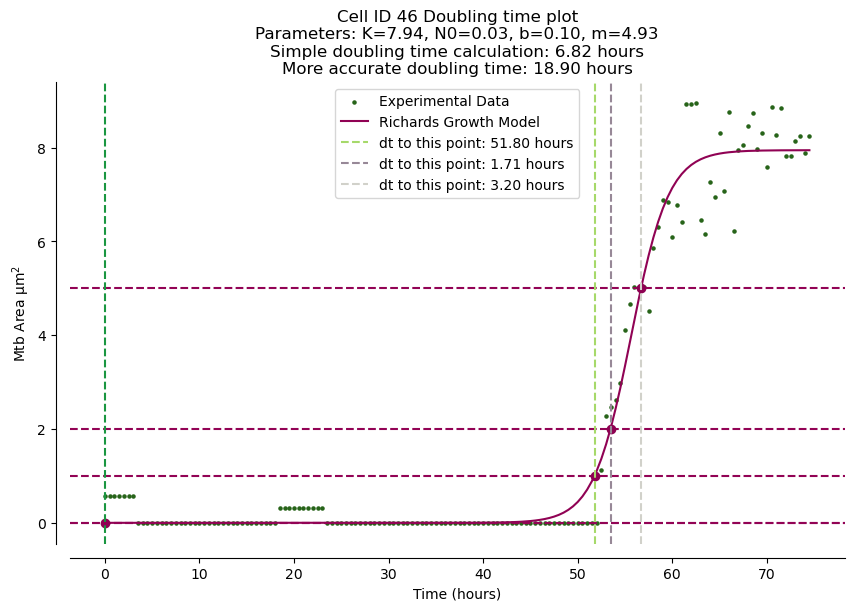

Simple doubling time calculation: 6.82 hours
More accurate doubling time: 18.90 hours


In [222]:
smoothed = smooth_array(np.nan_to_num(track.properties['Mtb area px']), window_size=10)
bacterial_population =smoothed * pixel_to_mum_sq_scale_factor
# bacterial_population = np.nan_to_num(bacterial_population)
time_points = np.array(track.t) * frames_to_hours_scale_factor
# bacterial_population = t.properties['Mtb area px'] * pixel_to_mum_sq_scale_factor
# bacterial_population = np.nan_to_num(bacterial_population)
# time_points = np.array(t.t) * frames_to_hours_scale_factor

# Fit the Richards growth model to the data
initial_guess = [max(bacterial_population), min(bacterial_population), 0.1, 2.0]  # Initial parameter guesses
params, covariance = curve_fit(richards_growth, time_points, bacterial_population, p0=initial_guess)

# Extract the model parameters
K, N0, b, m = params

# Create a time array for the model
time_model =time_points # np.linspace(0, len(bacterial_population)-1, len(time_points)) # np.linspace(0, len(bacterial_population)-1, 100)

# Calculate the model's bacterial population predictions
population_model = richards_growth(time_model, K, N0, b, m)

# Calculate the doubling points 
doubling_series = []
current_value = min(bacterial_population[bacterial_population >0])
while 0 < current_value <= max(bacterial_population):
    doubling_series.append(int(current_value))
    current_value *= 2
    
# Plot the experimental data and the fitted model
plt.figure(figsize=(10, 6))
plt.scatter(time_points, bacterial_population, label='Experimental Data', color=green_colors[0], s = 5)
plt.plot(time_model, population_model, label='Richards Growth Model', color=pink_colors[1])


# Plot the horizontal lines from the doubling series
for value in doubling_series:
    plt.axhline(y=value, color=pink_colors[2], linestyle='--',) 
                # label=f'Doubling Value: {value}')

# Perform linear interpolation to estimate population values at intermediate time points
interpolator = interp1d(time_model, population_model, kind='linear', fill_value='extrapolate')
interpolated_time_points = np.linspace(min(time_points), max(time_points), num=int(max(population_model))*100) # the number of points needs to be granular enough to cover every integer between min and max population values as then all intersections can be reliably found 
interpolated_population = [int(i) for i in interpolator(interpolated_time_points)]

# drop duplicate interpolated population values and corresponding time points
unique_interpolated_time_points = []
unique_interpolated_population = []

# Initialize a set to keep track of seen population values
seen_population_values = set()

# Iterate through the lists and append unique population values
for time, population in zip(interpolated_time_points, interpolated_population):
    if population not in seen_population_values:
        unique_interpolated_time_points.append(time)
        unique_interpolated_population.append(population)
        seen_population_values.add(population)

# Find and mark the intersections between the interpolated population and the doubling series
intersections = [(t, N) for t, N in zip(unique_interpolated_time_points, unique_interpolated_population) if N in doubling_series]
for t, N in intersections:
    plt.plot(t, N, 'ro', color = pink_colors[0])

# calculate the elapsed doubling times 
doubling_time_points = [t for (t, N) in intersections]
doubling_times = [doubling_time_points[i+1]-doubling_time_points[i] for i in range(len(doubling_time_points)-1)]
average_doubling_time = np.mean(doubling_times)
# Plot the vertical  lines from the doubling series

for i, time in enumerate(doubling_time_points):
    if i == 0:
        plt.axvline(x=time, color=expanded_piyg[i], linestyle='--',)# label=f'Doubling time point: {time:.2f} hours')
    else:
        dt = doubling_times[i-1]
        plt.axvline(x=time, color=expanded_piyg[i], linestyle='--', label=f'dt to this point: {dt:.2f} hours')

# Add labels, legend, and title
plt.xlabel('Time (hours)')
plt.ylabel('Mtb Area µm$^{2}$')
plt.legend()

# cell_ID = sc_dt_df['Unique ID'].unique()
plt.title(f'Cell ID {cell_ID} Doubling time plot\nParameters: K={K:.2f}, N0={N0:.2f}, b={b:.2f}, m={m:.2f}\nSimple doubling time calculation: {np.log(2)/b:.2f} hours\nMore accurate doubling time: {average_doubling_time:.2f} hours')
sns.despine(offset = 10)
# Show the plot
plt.grid(False)

plt.show()

print(f'Simple doubling time calculation: {np.log(2)/b:.2f} hours')
print(f'More accurate doubling time: {average_doubling_time:.2f} hours')


# More training data

### Pick a frame

In [51]:
t = 0
image_frame = image_stack[t]
segmentation_frame = segmentation[t]

### Convert to semantic

In [52]:
gt_masks = tools.instance_to_semantic(segmentation_frame)

Iterating over segments:   0%|          | 0/228 [00:00<?, ?it/s]

In [55]:
acq_ID

(3, 4)

In [62]:
gt_image_fn = os.path.join(base_dir, f'labels/macrohet_seg_model/training/{acq_ID}_t{t}_gt_image.tif')
io.imsave(gt_image_fn, image_frame)

In [63]:
gt_mask_fn = os.path.join(base_dir, f'labels/macrohet_seg_model/training/{acq_ID}_t{t}_gt_masks.tif')

### Open new napari session

In [64]:
v = napari.Viewer()
v.add_image(image_frame, colormap='green', contrast_limits=[0,8000], blending = 'additive')
v.add_image(image_frame, colormap='green', contrast_limits=[0,4500], blending = 'additive', name = 'images_bright', visible = False)
visualise.add_napari_grid_overlay(viewer = v, N_rows_cols=5)

v.add_labels(gt_masks, color={1:'yellow'}, opacity=0.5, blending = 'additive')
# v.add_image(other_ch_image, colormap='magenta', contrast_limits = [0,4000], blending = 'additive', scale=[1/4, 1/4])
@v.bind_key("s", overwrite = True)
def save_masks(v):  
    v.layers['gt_masks'].save(gt_mask_fn.replace('semantic', 'backup'))
    print('Saved')
@v.bind_key("b", overwrite = True)
def show_bright_gt_image(v):  
    v.layers['images_bright'].visible = 1 if v.layers['ds_images_bright'].visible == 0 else 0

In [67]:
v.title = 'gt masks'